
**Úloha**  
- Úloha je naprogramovať funkciu na **vypočítanie pomeru modrých lôpt ku oranžovým** cez Vašu Houghovu transformáciu z tasku 3.
- Funkcia bude mať formát:  
  `ratio = JankoHrasko(img)`  
  *(použite Vaše "MenoPriezvisko")*
- **Vstup**:  
  `img` - 1 ks obrázok
- **Výstup**:  
  `ratio` - desatinné číslo reprezentujúce pomer MODRÁ (ratio) ku ORANŽOVÁ (1)
- Obrázok je veľký, zmenšite si ho.
- Nezabudnite, že ak máte spočítať určité farby, musíte urobiť **predspracovanie** alebo post processing na vylúčenie ostatných farieb.
- **Deadline** je **9:15**, dovtedy všetko na gite.
- Keď dokončíte, napíšte správu do komentáru, aby sa vytvoril poradovník.



In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from skimage import io, color
from typing import Tuple, Optional
from scipy import ndimage

In [3]:
path = "/content/OIP.jpg"
img = io.imread(path)

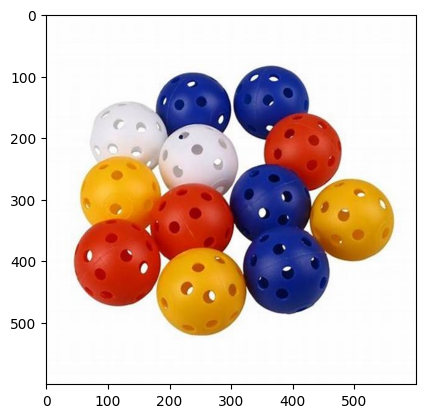

In [34]:
plt.imshow(img)
plt.show()

In [96]:
def DmytroVarich(img: np.ndarray, size: Optional[Tuple[int, int]] = None, ratio_colors: Tuple[str, str] = ("blue", "orange"), show_img: bool = False) -> float:
  # Resize
  if size is not None:
    img = cv2.resize(img, size, interpolation=cv2.INTER_NEAREST)

  # Normalization
  img = img.astype(np.float32) / 255.0
  img = np.clip(img, 0, 1)

  # Change the background color to green
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  lower_white = np.array([0, 0, 0.98], dtype=np.float32)
  upper_white = np.array([150, 1, 1], dtype=np.float32)
  mask = cv2.inRange(hsv, lower_white, upper_white)
  output = img.copy()
  output[mask > 0] = [0, 1, 0]

  # Convert to Lab space
  imgLab = color.rgb2lab(output)

  def get_balls_color(color: str) -> np.ndarray:
    """Function for selecting balls of a certain color"""
    if color == "blue":
      balls_color = (imgLab[:, :, 1] > 10) * (imgLab[:, :, 1] < 60) * (imgLab[:, :, 2] < -15) * (imgLab[:, :, 2] > -60)
    elif color == "orange":
      balls_color = (imgLab[:, :, 1] > 53) * (imgLab[:, :, 1] < 100) * (imgLab[:, :, 2] > 20) * (imgLab[:, :, 2] < 100)
    elif color == "yellow":
      balls_color = (imgLab[:, :, 1] > -30) * (imgLab[:, :, 1] < 30) * (imgLab[:, :, 2] > 20) * (imgLab[:, :, 2] < 100)
    elif color == "white":
      balls_color = (imgLab[:, :, 1] > -10) * (imgLab[:, :, 1] < 10) * (imgLab[:, :, 2] > -10) * (imgLab[:, :, 2] < 10) * (imgLab[:, :, 0] > 80) * (imgLab[:, :, 0] < 95)
    return balls_color

  def apply_hough_circles(balls_color: np.ndarray) -> np.ndarray:
    """Circle search function using the Hough transform"""
    gray_image = cv2.cvtColor(balls_color.astype(np.uint8) * 255, cv2.COLOR_GRAY2BGR)
    blured_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    median_image = ndimage.median_filter(blured_image, size=10)
    median_image_gray = cv2.cvtColor(median_image, cv2.COLOR_BGR2GRAY)
    circles = cv2.HoughCircles(
        median_image_gray,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=20,
        param1=50,
        param2=20,
        minRadius=10,
        maxRadius=50
    )
    return circles

  def get_count_balls(circles: np.ndarray, color: str, img: np.ndarray, show_img: bool = False) -> int | str:
    """Ball counting function"""
    if circles is not None:
      if show_img:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
          center = (circle[0], circle[1])
          radius = circle[2]

          cv2.circle(img, center, radius, (0, 255, 0), 2)
          cv2.circle(img, center, 2, (0, 255, 0), 3)

        plt.imshow(np.clip(img, 0, 1))
        plt.title(f"Circles (Number of {color} balls: {len(circles[0])})")
        plt.show()
    else:
      return "No circles found"
    return len(circles[0])

  # Determine the number of balls of each color
  circles_1 = apply_hough_circles(get_balls_color(ratio_colors[0]))
  circles_2 = apply_hough_circles(get_balls_color(ratio_colors[1]))

  count_balls_1 = get_count_balls(circles_1, ratio_colors[0], img.copy(), show_img)
  count_balls_2 = get_count_balls(circles_2, ratio_colors[1], img.copy(), show_img)

  # Calculate the ratio
  if isinstance(count_balls_1, int) or isinstance(count_balls_2, int) and count_balls_2 != 0:
    ratio = count_balls_1 / count_balls_2
  else:
    ratio = 0.0

  return ratio

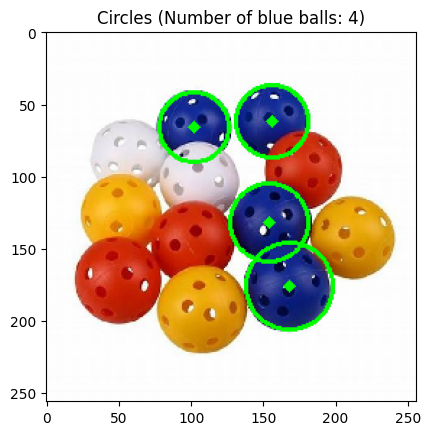

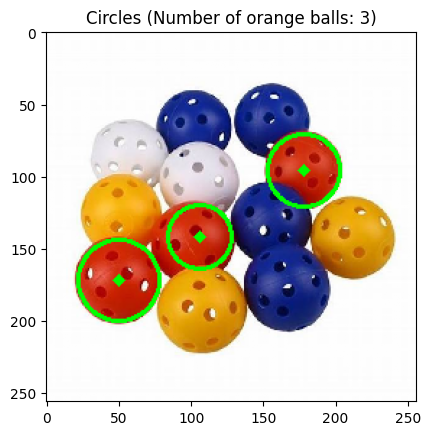

Ratio of blue balls to orange balls: 1.333


In [97]:
balls_color_1 = "blue"
balls_color_2 = "orange"
ratio = DmytroVarich(img, (256, 256), (balls_color_1, balls_color_2), True)
print(f"Ratio of {balls_color_1} balls to {balls_color_2} balls: {ratio:.3f}")

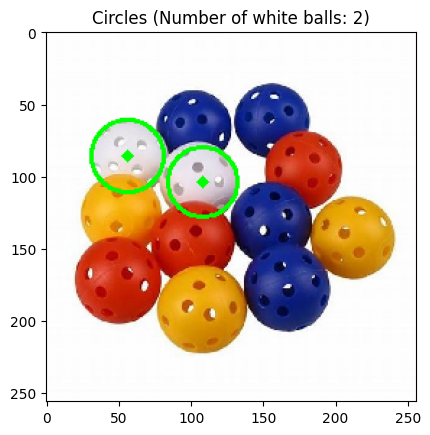

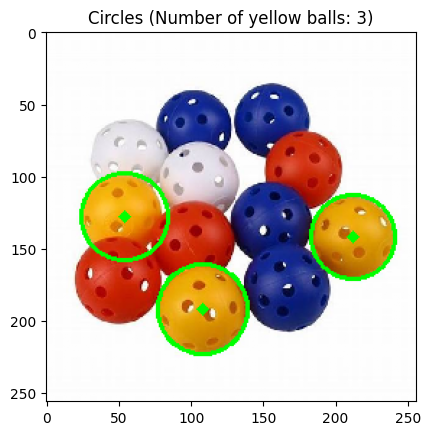

Ratio of white balls to yellow balls: 0.667


In [98]:
balls_color_1 = "white"
balls_color_2 = "yellow"
ratio = DmytroVarich(img, (256, 256), (balls_color_1, balls_color_2), True)
print(f"Ratio of {balls_color_1} balls to {balls_color_2} balls: {ratio:.3f}")